## Introduction to QuTip
Looking at some of the basic functions in QuTip. The Users Guide for QuTip can be accessed here: http://qutip.org/downloads/4.2.0/QuTiP_4.2.pdf

#### Load relevant packages

In [7]:
import math
import numpy as np
import scipy.constants as sp
import matplotlib.animation as animation
import matplotlib as matplotlib
from matplotlib import rc
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from qutip import *

#### The quantum object class
A quantum object is the basic way to create vectors and matrices in QuTip that represent states and operators. A quantum object can be created by specifying the shape of the matrix in the function Qobj as below

In [8]:
k1 = Qobj([[1],[2],[3],[4],[5]])
k1

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]

However, QuTip also provides several built-in functions to create various frequently encountered states and operators. To create state vectors for example, use the function basis or fock to create a 5-level state ket with the 3rd level occupied as below. See page 14 of the Users Guide for a list of all the functions for creating states or operators.

In [3]:
k2 = basis(5, 3)
k2

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]]

Notice that the quantum object has a dimension (dims), shape, and type. These attributes can be accessed by calling Qobj.attribute. Any quantum object will have the following attributes: data (matrix type spare/full), dims (its dimensions), shape, type (whether its a ket, bra, operator etc.), and isherm (whether it is Hermitian? results in a logical True or False). For example:

In [9]:
k2.type

'ket'

In [10]:
k2.isherm

False

In [11]:
k2.data

<5x1 sparse matrix of type '<class 'numpy.complex128'>'
	with 1 stored elements in Compressed Sparse Row format>

#### Functions operating on quantum objects
QuTip has several built-in common linear algebra type operations that one can perfrom on states or operators. For example, the Hermitian adjoint can be performed by calling the dag function as below. See page 18 of the Users Guide for a list of all functions operating on a quantum object.

In [12]:
b2 = k2.dag()
b2

Quantum object: dims = [[1], [5]], shape = (1, 5), type = bra
Qobj data =
[[0. 0. 0. 1. 0.]]

### Exercise 1: Getting familiar with QuTiP functions

Consider the following Hermitian operators:
\begin{equation}
A = \left( \begin{array}{c c c}
2 & i & 1 \\
-i & 2 & i \\
1 & -i & 2
\end{array} \right), \text{ }
B = \left( \begin{array}{c c c}
3 & 2 & i \\
2 & 1 & 1 \\
-i & 1 & 0
\end{array} \right).
\end{equation}
Use QuTiP functions to carry out each of the following.

(a) Check that $A$ and $B$ are Hermitian.

In [13]:
# initialize A and B as quantum objects and display them
A = Qobj([[2,1j,1],[-1j,2,1j],[1,-1j,2]])
B = Qobj([[3,2,1j],[2,1,1],[-1j,1,0]])
display(A)
display(B)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[2.+0.j 0.+1.j 1.+0.j]
 [0.-1.j 2.+0.j 0.+1.j]
 [1.+0.j 0.-1.j 2.+0.j]]

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[3.+0.j 2.+0.j 0.+1.j]
 [2.+0.j 1.+0.j 1.+0.j]
 [0.-1.j 1.+0.j 0.+0.j]]

In [14]:
# check that both A and B are Hermitian
display(A.isherm)
display(B.isherm)

True

True

(b) Calculate $A + B$, $A B$, $[A,B]$, $A^{\text{T}}$, $A^{*}$, $A^{\dagger}$, $\text{Tr}(A)$, and $e^A$.

In [15]:
# calculating addition of A and B
A + B

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[5.+0.j 2.+1.j 1.+1.j]
 [2.-1.j 3.+0.j 1.+1.j]
 [1.-1.j 1.-1.j 2.+0.j]]

In [16]:
# calculating multiplication of A and B
A * B

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[6.+1.j 5.+1.j 0.+3.j]
 [5.-3.j 2.-1.j 3.+0.j]
 [3.-4.j 4.-1.j 0.+0.j]]

In [17]:
# calculating commutator of A and B
commutator(A,B,kind="normal")

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[ 0.+2.j  0.-2.j -3.-1.j]
 [ 0.-2.j  0.-2.j -1.-1.j]
 [ 3.-1.j  1.-1.j  0.+0.j]]

In [18]:
# calculating transpose of A
A.trans()

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[2.+0.j 0.-1.j 1.+0.j]
 [0.+1.j 2.+0.j 0.-1.j]
 [1.+0.j 0.+1.j 2.+0.j]]

In [19]:
# calculating conjugate of A
A.conj()

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[2.+0.j 0.-1.j 1.+0.j]
 [0.+1.j 2.+0.j 0.-1.j]
 [1.+0.j 0.+1.j 2.+0.j]]

In [20]:
# calculating conjugate transpose of A
A.dag()

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[2.+0.j 0.+1.j 1.+0.j]
 [0.-1.j 2.+0.j 0.+1.j]
 [1.+0.j 0.-1.j 2.+0.j]]

In [21]:
# calculating trace of A
A.tr()

6.0

In [22]:
# calculating matrix exponentiation of A
A.expm()

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[13.72369128+0.j          0.        +6.36184564j  6.36184564+0.j        ]
 [ 0.        -6.36184564j 13.72369128+0.j          0.        +6.36184564j]
 [ 6.36184564+0.j          0.        -6.36184564j 13.72369128+0.j        ]]

(c) Find the eigenvalues and normalized eigenvectors of $A$ and $B$. Explicitly check that your results satisfy the eigenvalue equation, and show that the eigenvectors form an orthonormal set. 

In [23]:
# everything here relates to matrix A
# get eigenvalues and eigenvectors
e_a = A.eigenstates()

# check that they satisfy the eigenvalue equation
for i in range(3):
    display(A * e_a[1][i] == e_a[0][i] * e_a[1][i])

# check that the eigenvectors are of norm one
for i in range(3):
    display(e_a[1][i].norm())
    
# check that the set is orthogonal, and thus orthonormal    
display(e_a[1][0].dag() * e_a[1][1])
display(e_a[1][0].dag() * e_a[1][2])
display(e_a[1][1].dag() * e_a[1][2])

True

True

True

1.0

0.9999999999999999

1.0

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [24]:
# everything here relates to B
# get eigenvalues and eigenvectors
e_b = B.eigenstates()

# check that they satisfy the eigenvalue equation
for i in range(3):
    display(B * e_b[1][i] == e_b[0][i] * e_b[1][i])

# check that the eigenvectors are of norm one
for i in range(3):
    display(e_b[1][i].norm())

# check that the set is orthogonal, and thus orthonormal   
display(e_b[1][0].dag() * e_b[1][1])
display(e_b[1][0].dag() * e_b[1][2])
display(e_b[1][1].dag() * e_b[1][2])

True

True

True

1.0

1.0

1.0

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

(d) Calculate $A \otimes B$. Find the eigenvalues and eigenvectors of the resulting operator.

In [25]:
# calculate the tensor product of A and B and its eigenvalues and eigenvectors
C = tensor(A,B)
display(C)
display(C.eigenstates())

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[ 6.+0.j  4.+0.j  0.+2.j  0.+3.j  0.+2.j -1.+0.j  3.+0.j  2.+0.j  0.+1.j]
 [ 4.+0.j  2.+0.j  2.+0.j  0.+2.j  0.+1.j  0.+1.j  2.+0.j  1.+0.j  1.+0.j]
 [ 0.-2.j  2.+0.j  0.+0.j  1.+0.j  0.+1.j  0.+0.j  0.-1.j  1.+0.j  0.+0.j]
 [ 0.-3.j  0.-2.j  1.+0.j  6.+0.j  4.+0.j  0.+2.j  0.+3.j  0.+2.j -1.+0.j]
 [ 0.-2.j  0.-1.j  0.-1.j  4.+0.j  2.+0.j  2.+0.j  0.+2.j  0.+1.j  0.+1.j]
 [-1.+0.j  0.-1.j  0.+0.j  0.-2.j  2.+0.j  0.+0.j  1.+0.j  0.+1.j  0.+0.j]
 [ 3.+0.j  2.+0.j  0.+1.j  0.-3.j  0.-2.j  1.+0.j  6.+0.j  4.+0.j  0.+2.j]
 [ 2.+0.j  1.+0.j  1.+0.j  0.-2.j  0.-1.j  0.-1.j  4.+0.j  2.+0.j  2.+0.j]
 [ 0.-1.j  1.+0.j  0.+0.j -1.+0.j  0.-1.j  0.+0.j  0.-2.j  2.+0.j  0.+0.j]]

(array([-3.63055239e+00, -3.63055239e+00, -8.71291668e-15, -1.71385855e-16,
        -1.11022302e-16,  2.21786584e+00,  2.21786584e+00,  1.34126865e+01,
         1.34126865e+01]),
 array([Quantum object: dims = [[3, 3], [1, 1]], shape = (9, 1), type = ket
 Qobj data =
 [[-0.31446215+0.j        ]
  [ 0.45446986+0.18776889j]
  [-0.37553778-0.41500382j]
  [-0.00496563+0.11957038j]
  [ 0.0785733 -0.16984157j]
  [-0.16373019+0.13624037j]
  [-0.19489176+0.00496563j]
  [ 0.28462829+0.10919559j]
  [-0.23929741-0.25127363j]],
        Quantum object: dims = [[3, 3], [1, 1]], shape = (9, 1), type = ket
 Qobj data =
 [[-0.0438632 +0.j        ]
  [ 0.06339237+0.02619121j]
  [-0.05238242-0.0578874j ]
  [ 0.03559938+0.291927j  ]
  [ 0.12286363-0.4431582j ]
  [-0.34275001+0.39560722j]
  [ 0.2480638 -0.03559938j]
  [-0.37976583-0.09667242j]
  [ 0.3432248 +0.28486262j]],
        Quantum object: dims = [[3, 3], [1, 1]], shape = (9, 1), type = ket
 Qobj data =
 [[-0.04502272+0.j        ]
  [ 0.21169932-0.4

### Exercise 2: Visualizing and Time Evolving a Qubit

Consider a general qubit state of the form
\begin{equation}
|\psi\rangle = \cos(\theta/2) |0\rangle + \sin(\theta/2) e^{i \phi} |1\rangle.
\end{equation}
Suppose that the qubit evolves in time under the Hamiltonian $H = \frac{\hbar \omega}{2} \sigma_x$, where $\sigma_x = \left( \begin{array}{c c}
0 & 1 \\
1 & 0
\end{array} \right)$.

(a) Suppose that at time $t = 0$, the qubit is in the state $\theta = 0, \phi = 0$. Construct this state in QuTiP.

In [26]:
# at theta = 0 and phi = 0, the qubit state is zero ket
zero_ket = basis(2,0)
zero_ket

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

(b) Calculate the expectation values $\langle \sigma_x \rangle, \langle \sigma_y \rangle, \langle \sigma_z \rangle,$ where $\sigma_y = \left( \begin{array}{c c}
0 & -i \\
i & 0
\end{array} \right)$ and $\sigma_z = \left( \begin{array}{c c}
1 & 0 \\
0 & -1
\end{array} \right)$

In [27]:
# initilize all manipulation matrices sigma as quantum objects
sigma_x = Qobj([[0,1],[1,0]])
sigma_y = Qobj([[0,-1j],[1j,0]])
sigma_z = Qobj([[1,0],[0,-1]])

# save zero bra as the conjugate transpose of zero ket
zero_bra = zero_ket.dag()

# expectation value <sigma_x>
display(zero_bra * sigma_x * zero_ket)
# expectation value <sigma_y>
display(zero_bra * sigma_y * zero_ket)
# expectation value <sigma_z>
display(zero_bra * sigma_z * zero_ket)

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.]]

(c) Visualize this initial state on the Bloch sphere.

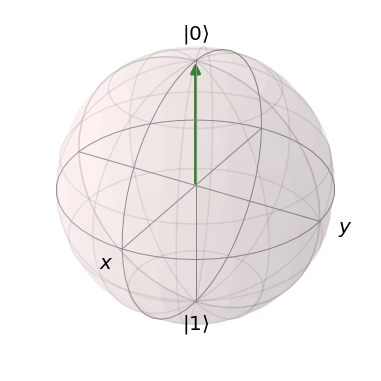

In [28]:
# initialize the Bloch sphere and add the zero_ket initial state of it
b = Bloch()
b.add_states([zero_ket])
b.show()

(d) What is the analytical form of the time evolution operator for this Hamiltonian?

In [36]:
# analytical form general function for re-usage in 2(e)
# formula for the analytical form is e^(-i * H * t / hbar) -- hbar cancel
def analytical_form(t, little_omega):
    # here, H = (hbar * little_omega / 2) * sigma_x
    H = (little_omega / 2) * sigma_x
    return (-1j * H * t).expm()  

# analytical form with the current conditions
display(analytical_form(0, 0))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

(e) Let $\omega = \pi \frac{\text{rad}}{\text{s}}.$ Determine the state of the qubit at time $T = 0.25, 0.5, 0.75$ and $1 \text{ s}$.

In [37]:
# to determine the state, we perform: time evolution operator * initial state
# save initial state under a easier to remember variable
initial_state = zero_ket

# qubit state at T = 0.25 s
state1 = analytical_form(0.25, np.pi) * initial_state
display(state1)

# qubit state at T = 0.50 s
state2 = analytical_form(0.50, np.pi) * initial_state
display(state2)

# qubit state at T = 0.75 s
state3 = analytical_form(0.75, np.pi) * initial_state
display(state3)

# qubit state at T = 1.00 s
state4 = analytical_form(1.00, np.pi) * initial_state
display(state4)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.92387953+0.j        ]
 [0.        -0.38268343j]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678+0.j        ]
 [0.        -0.70710678j]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.38268343+0.j        ]
 [0.        -0.92387953j]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.+0.j]
 [0.-1.j]]

(f) Plot the states found in (e) on the Bloch sphere. What is happening to the qubit?

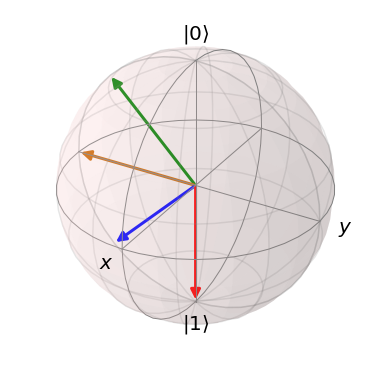

In [38]:
# initialize new Blocu sphere and add states calculated in 2(e) and show the new Bloch sphere
b1 = Bloch()
b1.add_states([state1, state2, state3, state4])
b1.show()

### What is happening to the qubit:

The qubit is rotating from zero ket to one ket. A classical bit could only be either 0 or 1,
so either at the top or at the bottom of the Bloch sphere. Here however, we are dealing with
qubits and they can take a superposition of 0 and 1, and thus be at any points between the 
top and the bottom of the sphere, as we see in this qubit's rotation. In more physical terms,
the qubit's spin is rotation from spin up to spin down (that is, assuming that our qubit is
represented as an electron. If it were represented as a photon for instance, the rotation of
the qubit represents the shift from horizontal polarization to vertical polarization.).

Bonus: Create a simulation of the qubit dynamics as it evolves from $t = 0 \text{ s}$ to $t = 1 \text{ s}$.

<IPython.core.display.Javascript object>


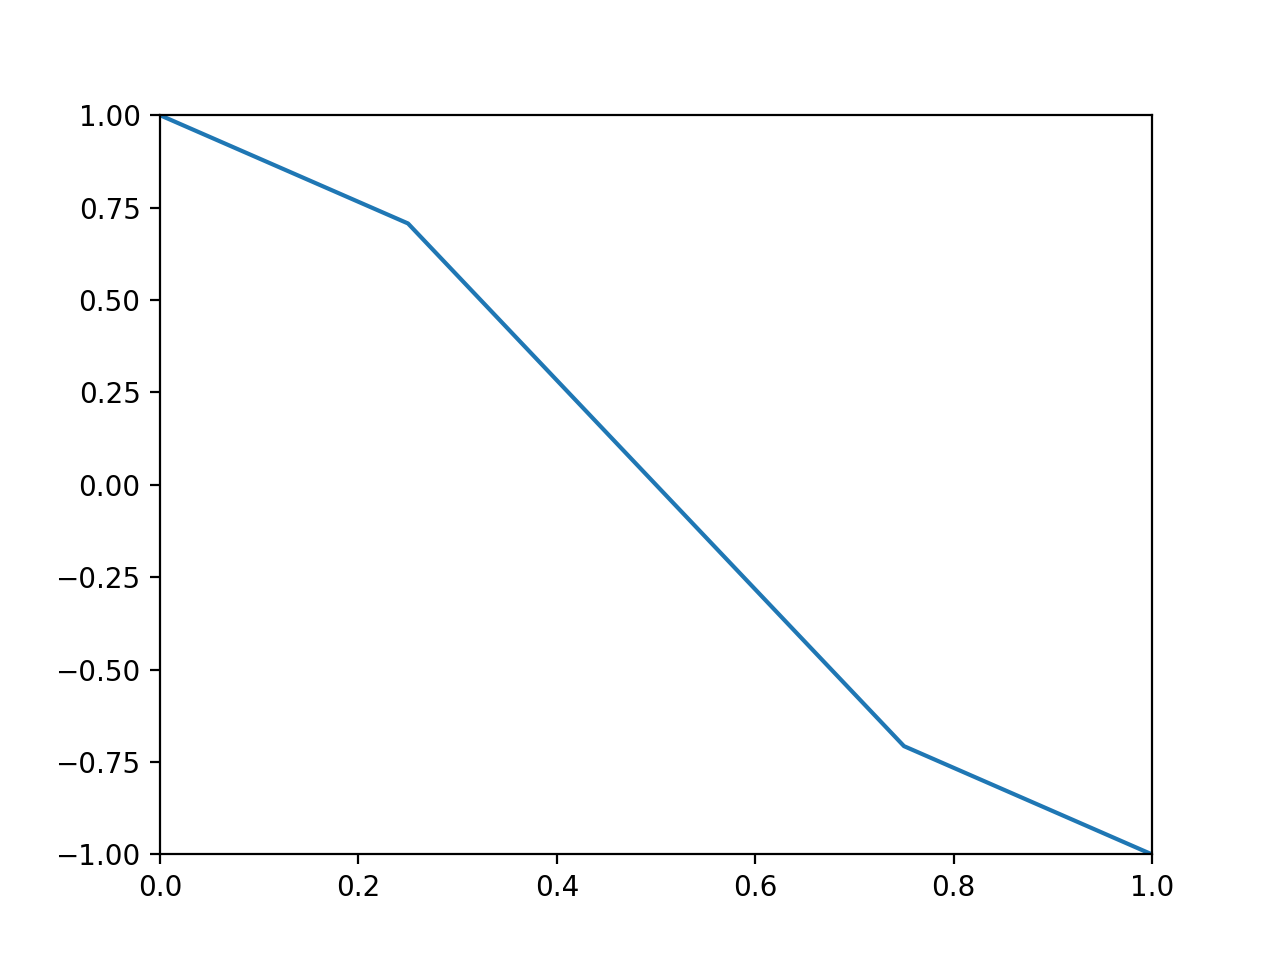

In [39]:
# use notebook backend for animation
%matplotlib notebook

# data points to be plotted
t = [0.00,0.25,0.50,0.75,1.00]
y = [1,math.sqrt(2)/2,0,-math.sqrt(2)/2,-1]

# define the plot and it's bounds
fig, ax = plt.subplots()
ax.axis([0,1,-1,1])
l, = ax.plot([],[])

# animate the plot
def animate(i):
    l.set_data(t[:i], y[:i])
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=10)

# output the animation
HTML(ani.to_jshtml())

# I was unsure about what kind of animation was desired, so I made a simple animation by converting the qubit
# position to a real-numbers only position on the unit sphere and graphed it's decrease over time.